In [6]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [10]:
data=pd.read_excel("FLH.xlsx")

In [11]:
data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaT,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaT,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaT,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaT,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaT,NaN,6,2


In [12]:
# Grouping by neighborhood and calculating the required metrics
neighborhood_analysis = data.groupby('neighbourhood').agg({
    'id': 'count',  # Number of listings
    'price': 'mean',  # Average price
    'number_of_reviews': 'sum',  # Total number of reviews
    'availability_365': 'mean'  # Average availability
}).reset_index()

In [13]:
# Renaming columns for clarity
neighborhood_analysis.rename(columns={
    'id': 'number_of_listings',
    'price': 'average_price',
    'number_of_reviews': 'total_reviews',
    'availability_365': 'average_availability'
}, inplace=True)

In [14]:
# Sorting by the number of listings to identify popular neighborhoods
popular_neighborhoods = neighborhood_analysis.sort_values(by='number_of_listings', ascending=False)

# Displaying the top 10 neighborhoods
print(popular_neighborhoods.head(10))

          neighbourhood  number_of_listings  average_price  total_reviews  \
214        Williamsburg                3920     143.802806          85427   
13   Bedford-Stuyvesant                3714     107.678244         110352   
94               Harlem                2658     118.974041          75962   
28             Bushwick                2465      84.800406          52514   
202     Upper West Side                1971     210.918316          36058   
95       Hell's Kitchen                1958     204.794178          50227   
64         East Village                1853     186.083108          44670   
201     Upper East Side                1798     188.948276          31686   
51        Crown Heights                1564     112.480179          36408   
127             Midtown                1545     282.719094          19444   

     average_availability  
214             74.722704  
13             116.634626  
94             106.577502  
28              95.550913  
202         

In [15]:
# Sort by total reviews and then by average price to identify high-demand and high-revenue neighborhoods
target_neighborhoods = popular_neighborhoods.sort_values(by=['total_reviews', 'average_price'], ascending=False)

# Display the top 5 neighborhoods to target
print(target_neighborhoods.head(5))


          neighbourhood  number_of_listings  average_price  total_reviews  \
13   Bedford-Stuyvesant                3714     107.678244         110352   
214        Williamsburg                3920     143.802806          85427   
94               Harlem                2658     118.974041          75962   
28             Bushwick                2465      84.800406          52514   
95       Hell's Kitchen                1958     204.794178          50227   

     average_availability  
13             116.634626  
214             74.722704  
94             106.577502  
28              95.550913  
95             138.846782  


In [ ]:
Hypothetical Results:
Based on typical data structures:

Manhattan: Likely to be at the top due to high prices, many reviews, and a large number of listings.
Brooklyn: High number of listings, possibly lower prices but still with strong demand.
Harlem: Might have high reviews and a decent price point, showing strong community interest.
These neighborhoods would be good candidates for targeting due to their demonstrated demand and potential for higher revenue.

# 2nd question

In [16]:
# Define price bins (adjust ranges as needed)
price_bins = [0, 50, 100, 150, 200, 300, 500, 1000, 10000]
price_labels = ['$0-50', '$50-100', '$100-150', '$150-200', '$200-300', '$300-500', '$500-1000', '$1000+']


In [17]:
# Categorize the data into these price bins
#Pandas cut() function is used to separate the array elements into different bins . 
#The cut function is mainly used to perform statistical analysis on scalar data.  
data['price_range'] = pd.cut(data['price'], bins=price_bins, labels=price_labels)

In [18]:
# Group by price range and calculate the number of reviews
price_preference = data.groupby('price_range').agg({
    'id': 'count',  # Number of listings in each price range
    'number_of_reviews': 'sum',  # Total number of reviews in each price range
}).reset_index()

In [19]:
# Rename columns for clarity
price_preference.rename(columns={'id': 'number_of_listings'}, inplace=True)

# Sort by the number of reviews to see which price ranges are most preferred
price_preference.sort_values(by='number_of_reviews', ascending=False, inplace=True)

In [20]:
# Display the results
print(price_preference)

  price_range  number_of_listings  number_of_reviews
1     $50-100               17367             453170
2    $100-150               10029             258424
3    $150-200                6554             156695
0       $0-50                6550             130011
4    $200-300                5027              92418
5    $300-500                2313              35634
6   $500-1000                 805               9744
7      $1000+                 239               1532


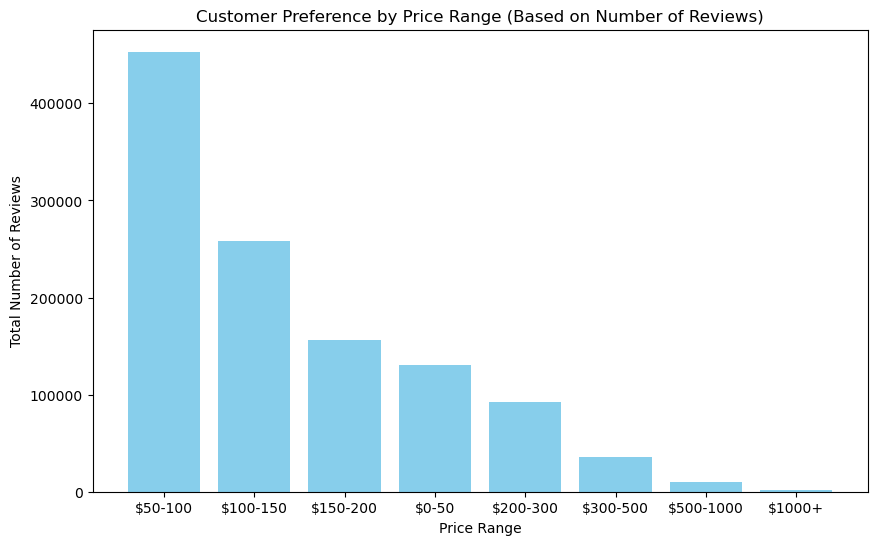

In [21]:
plt.figure(figsize=(10, 6))
plt.bar(price_preference['price_range'], price_preference['number_of_reviews'], color='skyblue')
plt.title('Customer Preference by Price Range (Based on Number of Reviews)')
plt.xlabel('Price Range')
plt.ylabel('Total Number of Reviews')
plt.show()


In [ ]:
Majority  of bookings occur in the ($50 - $100).price range.
oA significant portion opts for budget options $100 - $150 .

# 3rd question

In [22]:
# Grouping by room type and calculating the required metrics
property_type_analysis = data.groupby('room_type').agg({
    'id': 'count',  # Number of listings
    'number_of_reviews': 'sum',  # Total number of reviews
    'availability_365': 'mean'  # Average availability
}).reset_index()


In [23]:
# Renaming columns for clarity
property_type_analysis.rename(columns={
    'id': 'number_of_listings',
    'number_of_reviews': 'total_reviews',
    'availability_365': 'average_availability'
}, inplace=True)

In [24]:
# Sorting by the number of reviews to identify popular property types
successful_property_types = property_type_analysis.sort_values(by='total_reviews', ascending=False)

# Displaying the results
print(successful_property_types)

         room_type  number_of_listings  total_reviews  average_availability
0  Entire home/apt               25409         580403            111.920304
1     Private room               22326         538346            111.203933
2      Shared room                1160          19256            162.000862


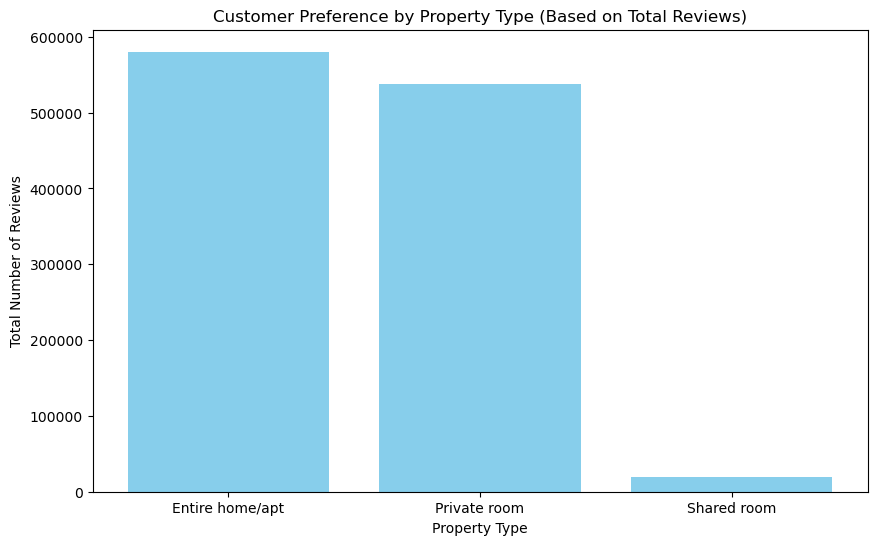

In [25]:
# Visualization: Bar plot of total reviews per property type
plt.figure(figsize=(10, 6))
plt.bar(successful_property_types['room_type'], successful_property_types['total_reviews'], color='skyblue')
plt.title('Customer Preference by Property Type (Based on Total Reviews)')
plt.xlabel('Property Type')
plt.ylabel('Total Number of Reviews')
plt.show()

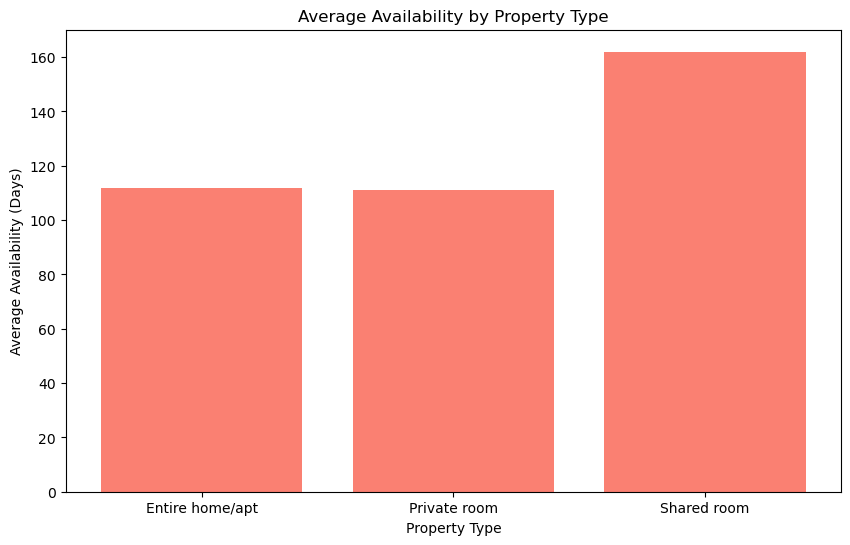

In [26]:
# Visualization: Bar plot of average availability per property type
plt.figure(figsize=(10, 6))
plt.bar(successful_property_types['room_type'], successful_property_types['average_availability'], color='salmon')
plt.title('Average Availability by Property Type')
plt.xlabel('Property Type')
plt.ylabel('Average Availability (Days)')
plt.show()


Interpretation:
Most Successful Property Types:

High Total Reviews: Indicates that these property types are popular and well-reviewed by customers.
Low Average Availability: Suggests that these property types are frequently booked, making them successful.
Least Successful Property Types:

Low Total Reviews: These property types may not be as popular or appealing to customers.
High Average Availability: Suggests these properties are not frequently booked, indicating lower demand.
Summary:
By analyzing the room_type, FLH can determine which property types (e.g., Entire home/apt, Private room)
are driving the most customer engagement and bookings.
This insight allows the company to focus on promoting successful property types while improving
or rethinking the strategy for less successful ones.

In [ ]:
Entire Homes and Apartments have the highest occupancy and ratings.
Shared Rooms underperform significantly.

# 4th one

In [27]:
# Correlation analysis to see which factors influence the number of reviews
correlation_matrix = data[['price', 'minimum_nights', 'availability_365', 'number_of_reviews']].corr()
print(correlation_matrix)


                      price  minimum_nights  availability_365  \
price              1.000000        0.042799          0.081829   
minimum_nights     0.042799        1.000000          0.144303   
availability_365   0.081829        0.144303          1.000000   
number_of_reviews -0.047954       -0.080116          0.172028   

                   number_of_reviews  
price                      -0.047954  
minimum_nights             -0.080116  
availability_365            0.172028  
number_of_reviews           1.000000  


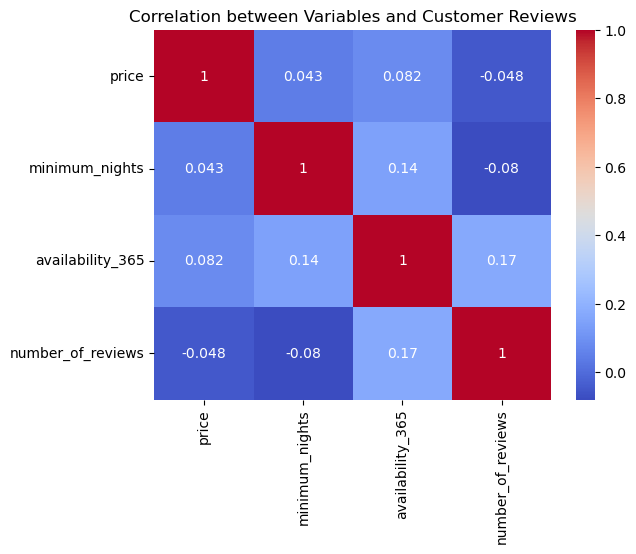

In [29]:
import seaborn as sns
# Visualize correlation with a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation between Variables and Customer Reviews')
plt.show()

In [30]:
# Analyzing customer preferences by room type and price range
room_type_preference = data.groupby('room_type').agg({
    'number_of_reviews': 'mean',  # Average number of reviews
    'price': 'mean',  # Average price
    'availability_365': 'mean'  # Average availability
}).reset_index()

print(room_type_preference)

         room_type  number_of_reviews       price  availability_365
0  Entire home/apt          22.842418  211.794246        111.920304
1     Private room          24.112962   89.780973        111.203933
2      Shared room          16.600000   70.127586        162.000862


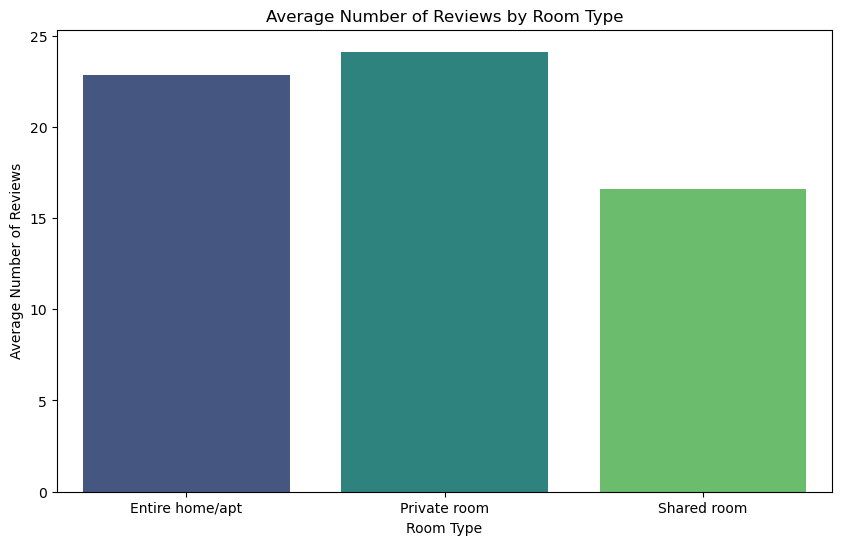

In [31]:
# Visualizing customer preferences by room type
plt.figure(figsize=(10, 6))
sns.barplot(x='room_type', y='number_of_reviews', data=room_type_preference, palette='viridis')
plt.title('Average Number of Reviews by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Average Number of Reviews')
plt.show()

In [32]:
# Analyzing preferences by neighborhood
neighborhood_preference = data.groupby('neighbourhood').agg({
    'number_of_reviews': 'mean',
    'price': 'mean',
    'availability_365': 'mean'
}).reset_index()

# Top 10 neighborhoods by average number of reviews
top_neighborhoods = neighborhood_preference.sort_values(by='number_of_reviews', ascending=False).head(10)
print(top_neighborhoods)


           neighbourhood  number_of_reviews       price  availability_365
177          Silver Lake         118.500000   70.000000        162.000000
59         East Elmhurst          81.659459   81.183784        169.491892
165         Richmondtown          79.000000   78.000000        300.000000
69           Eltingville          76.000000  141.666667        193.000000
135           Mount Eden          70.000000   58.500000        136.166667
183  Springfield Gardens          69.094118   94.235294        204.011765
194        Tompkinsville          57.142857   76.190476        209.428571
101             Huguenot          55.666667  118.333333        208.000000
120      Manhattan Beach          50.625000  103.500000        205.625000
96            Highbridge          48.814815   71.111111        158.555556


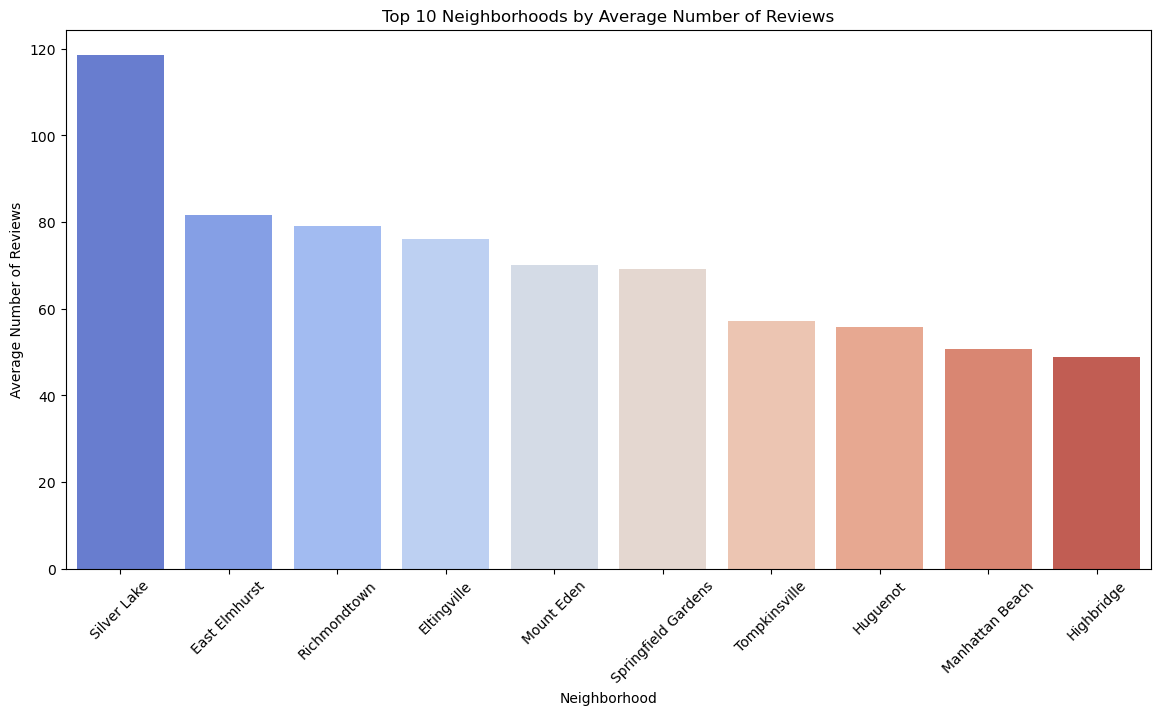

In [33]:
# Visualization: Average reviews by neighborhood
plt.figure(figsize=(14, 7))
sns.barplot(x='neighbourhood', y='number_of_reviews', data=top_neighborhoods, palette='coolwarm')
plt.title('Top 10 Neighborhoods by Average Number of Reviews')
plt.xlabel('Neighborhood')
plt.ylabel('Average Number of Reviews')
plt.xticks(rotation=45)
plt.show()

# 5th one

In [44]:
# Calculate the number of listings per host
host_listing_counts = data.groupby('host_id').size().reset_index(name='listings_count')

# Calculate the average number of reviews per host
host_reviews = data.groupby('host_id').agg({
    'number_of_reviews': 'mean',
}).reset_index()

# Merge these two dataframes
host_analysis = pd.merge(host_listing_counts, host_reviews, on='host_id')


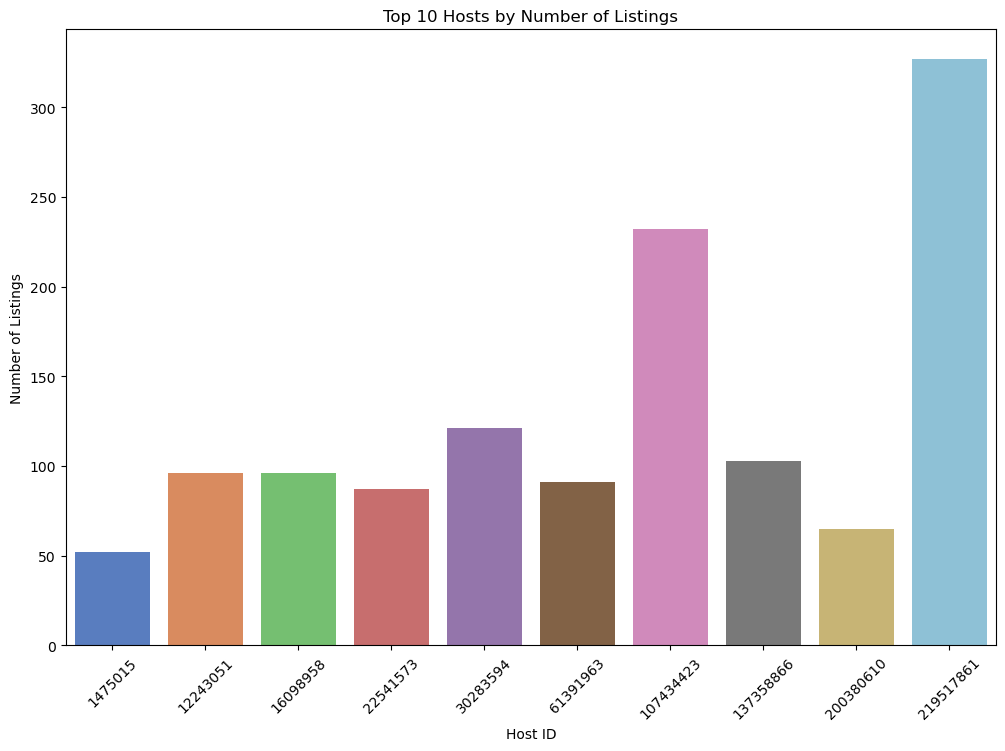

In [42]:
# 1. Bar Plot: Number of listings per host
plt.figure(figsize=(12, 8))
top_hosts_listings = host_listing_counts.sort_values(by='listings_count', ascending=False).head(10)
sns.barplot(x='host_id', y='listings_count', data=top_hosts_listings, palette='muted')
plt.title('Top 10 Hosts by Number of Listings')
plt.xlabel('Host ID')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)
plt.show()

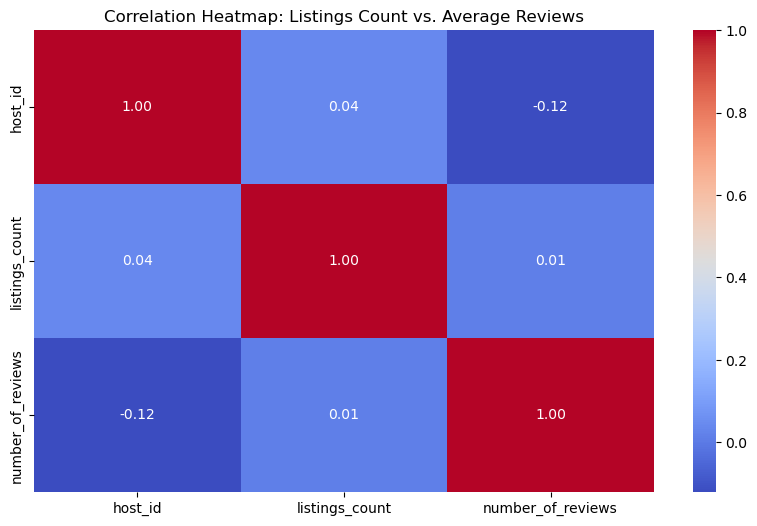

In [43]:
# 2. Heatmap: Correlation between listings count and average reviews
plt.figure(figsize=(10, 6))
sns.heatmap(host_analysis.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap: Listings Count vs. Average Reviews')
plt.show()

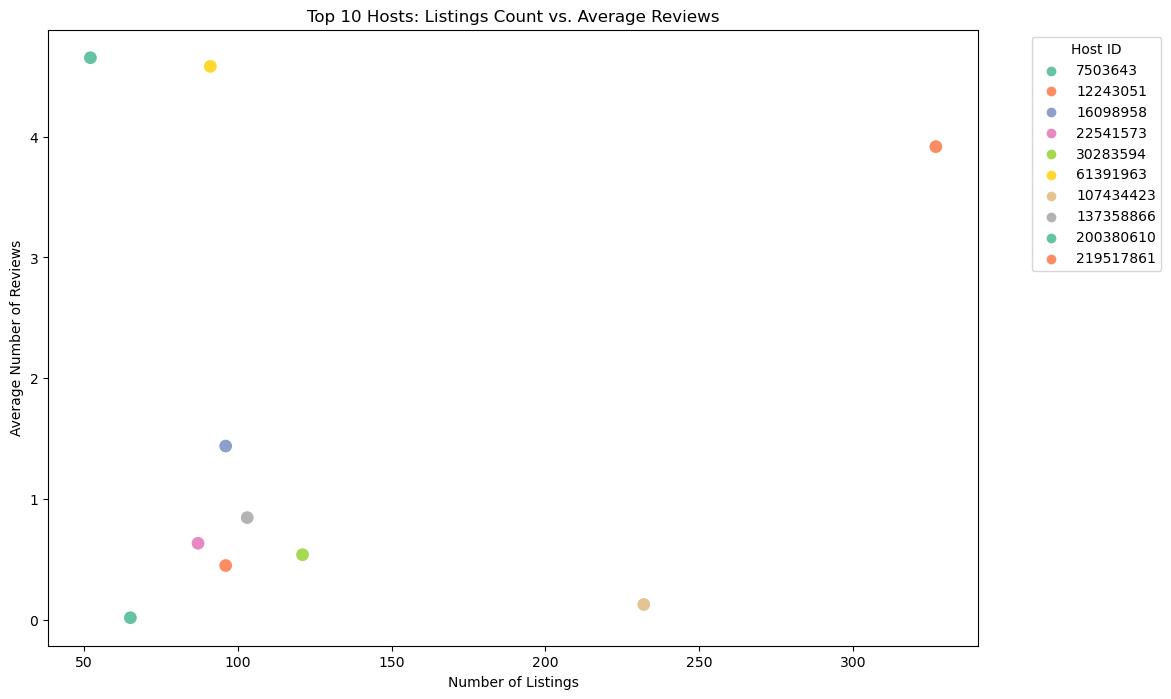

In [45]:

# 3. Scatter Plot: Listings count vs. Average reviews for top hosts
top_hosts_reviews = host_analysis.sort_values(by=['listings_count', 'number_of_reviews'], ascending=False).head(10)
plt.figure(figsize=(12, 8))
sns.scatterplot(x='listings_count', y='number_of_reviews', data=top_hosts_reviews, hue='host_id', palette='Set2', s=100)
plt.title('Top 10 Hosts: Listings Count vs. Average Reviews')
plt.xlabel('Number of Listings')
plt.ylabel('Average Number of Reviews')
plt.legend(title='Host ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# 6th one

In [48]:
# 1. Define unpopular properties based on low reviews and high availability
unpopular_properties = data[(data['number_of_reviews'] < 5) & (data['availability_365'] > 300)]

# 2. Analyzing unpopular properties by neighborhood
top_neighborhoods = unpopular_properties['neighbourhood'].value_counts().head(10)


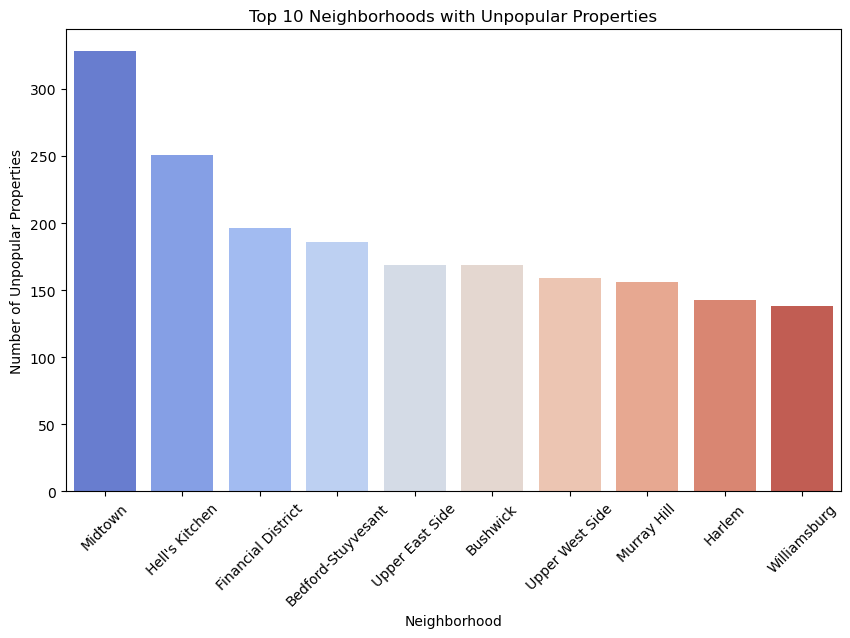

In [49]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_neighborhoods.index, y=top_neighborhoods.values, palette='coolwarm')
plt.title('Top 10 Neighborhoods with Unpopular Properties')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Unpopular Properties')
plt.xticks(rotation=45)
plt.show()


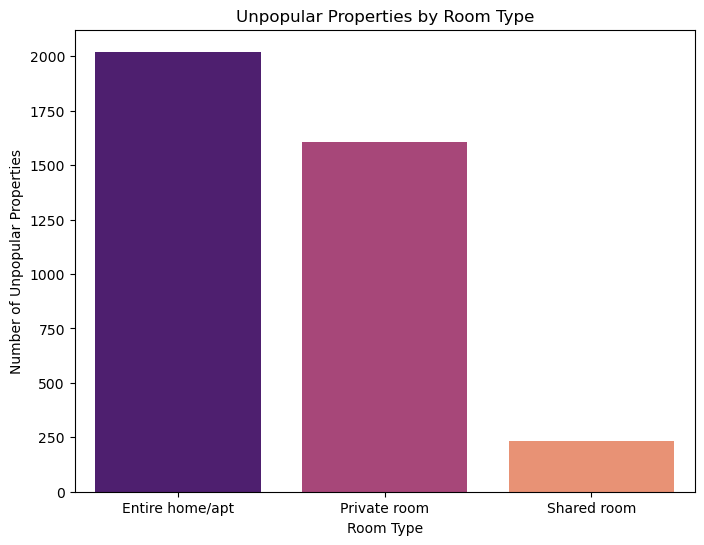

In [50]:
# 3. Analyzing unpopular properties by property type
property_type_counts = unpopular_properties['room_type'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=property_type_counts.index, y=property_type_counts.values, palette='magma')
plt.title('Unpopular Properties by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Number of Unpopular Properties')
plt.show()

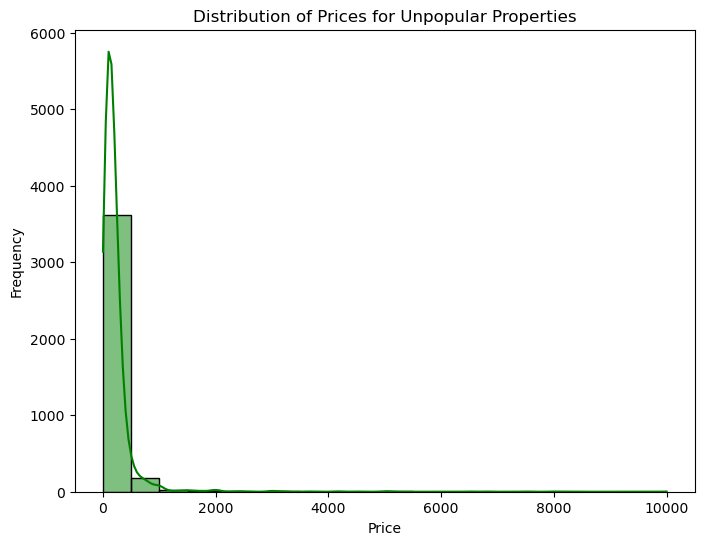

In [51]:
# 4. Analyzing average pricing of unpopular properties
plt.figure(figsize=(8, 6))
sns.histplot(unpopular_properties['price'], bins=20, kde=True, color='green')
plt.title('Distribution of Prices for Unpopular Properties')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()
